# Strain and Rotation

In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
#import sympy as sym
#from sympy.vector import CoordSys3D, Del

## Exercise 1

The diagonal entries of the strain tensor $\epsilon_{ij}$ describe volume changes and the off-diagonal entries describe shearing.

$\Delta V = \int_S u_n \, dS = \int_V \nabla \vec{u} \, dV  \,$  (Gauß)

$\frac{\Delta V}{V} = \frac{1}{V} \int_V \nabla \vec{u} \, dV $

$\lim\limits_{V \to 0} \, \frac{\Delta V}{V} = \frac{1}{V} \, \nabla \vec{u} \int_V dV = \nabla \vec{u} \,$ ($\vec{u}$ constant within infinitesimal volume)

$\nabla \vec{u} = \frac{\partial u_1}{\partial x_1} + \frac{\partial u_2}{\partial x_2} + \frac{\partial u_3}{\partial x_3} = \epsilon_{11} + \epsilon_{22} + \epsilon_{33} = \epsilon_{ii}$



## Exercise 2

In [44]:
u_zero = np.array([1500., 3300., 3000.])
u_delta = np.array([0.3, -0.1, 0.4])

def calculate_and_print_strain_tensor(original_volume, absolute_change):
    for i in range(3):
        e_i1 = 0.5 * (absolute_change[i] / original_volume[0] + absolute_change[0] / original_volume[i])
        e_i2 = 0.5 * (absolute_change[i] / original_volume[1] + absolute_change[1] / original_volume[i])
        e_i3 = 0.5 * (absolute_change[i] / original_volume[2] + absolute_change[2] / original_volume[i])
        print(f'e_{i+1}1 = {e_i1:.3e}  e_{i+1}2 = {e_i2:.3e}  e_{i+1}3 = {e_i3:.3e}')
        
calculate_and_print_strain_tensor(u_zero, u_delta)

print("Off-diagonal elements are wrong")

e_11 = 2.000e-04  e_12 = 1.212e-05  e_13 = 1.833e-04
e_21 = 1.212e-05  e_22 = -3.030e-05  e_23 = 4.394e-05
e_31 = 1.833e-04  e_32 = 4.394e-05  e_33 = 1.333e-04
Off-diagonal elements are wrong


## Exercise 3

Area before deformation: 2.00
Area after deformation: 8.00


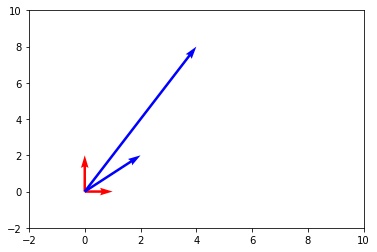

In [45]:
a = np.array([1,0])
b = np.array([0,2])
origin = np.array([[0,0,0,0], [0,0,0,0]])

strain_2d = np.array(([1,2], [2,3]))

def area_2vectors(a,b):
    return abs(np.cross(a,b))

res1 = area_2vectors(a,b)
print("Area before deformation: %.2f" % res1)

a2 = a + (strain_2d @ a)
b2 = b + (strain_2d @ b)

res2 = area_2vectors(a2,b2)
print("Area after deformation: %.2f" % res2)

plt.quiver(*origin, [a[0], b[0], a2[0], b2[0]], [a[1], b[1], a2[1], b2[1]], color=['r','r','b','b'], 
           angles='xy', scale_units='xy', scale=1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.show()

## Exercise 4

Length of y: 1.000000000000000
Length of y2: 2.828427124746190
Relative length change: 2.828427124746190
2.0
Length of y3 (linearization): 2.000000000000000
Relative length change: 2.000000000000000
Ratio of y2 to y3: 1.414213562373095


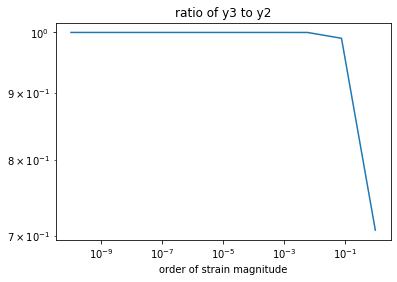

In [5]:
#y = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
y = np.array([1,0])

strain_2d_small = np.array(([1,2], [2,3])) #* 1e-6

y2 = y + (strain_2d_small @ y)

print(f"Length of y: {np.linalg.norm(y):0.15f}")
print(f"Length of y2: {np.linalg.norm(y2):0.15f}")
print(f"Relative length change: {np.linalg.norm(y2) / np.linalg.norm(y):0.15f}")

def deformed_vector_linear(y, tensor):
    y2 = 0
    for i in range(2):
        for j in range(2):
            y2 += tensor[i,j] * y[i] * y[j]
    return y2 / np.linalg.norm(y) + np.linalg.norm(y)  # DOUBLE CHECK IF CORRECT
    #return y2 / np.linalg.norm(y) ** np.linalg.norm(y)


y3 = deformed_vector_linear(y, strain_2d_small)
print(y3)

print(f"Length of y3 (linearization): {np.linalg.norm(y3):0.15f}")
print(f"Relative length change: {np.linalg.norm(y3) / np.linalg.norm(y):0.15f}")
print(f"Ratio of y2 to y3: {np.linalg.norm(y2) / np.linalg.norm(y3):0.15f}")


xvalues = np.geomspace(1e-10, 1, 10)
yvalues=np.zeros_like(xvalues)

for i in range(len(xvalues)):
    strain_2d_small = np.array(([1,2], [2,3])) * xvalues[i]
    y2 = y + (strain_2d_small @ y)
    y3 = deformed_vector_linear(y, strain_2d_small)
    yvalues[i] = np.linalg.norm(y3)/np.linalg.norm(y2)
    
plt.loglog(xvalues, yvalues)
plt.xlabel("order of strain magnitude")
plt.title("ratio of y3 to y2")
plt.show()


## Exercise 5

Rigid body rotation
Rotation angle: 45.0


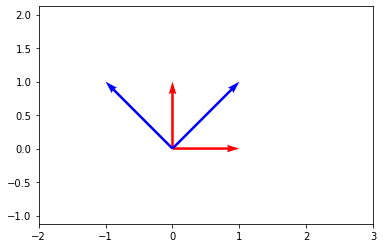

In [47]:
y = np.array([1.,0.])
z = np.array([0.,1.])

rot_2d = np.array(([0,-1], [1,0])) #* 1/np.sqrt(2)

y2 = y + rot_2d @ y
z2 = z + (rot_2d @ z)

theta = np.arctan(y2[1]/y[0]) * 360 / (2*np.pi)
print("Rigid body rotation")
print(f"Rotation angle: {theta}")
origin = np.array([[0,0,0,0], [0,0,0,0]])
plt.quiver(*origin, [y[0], z[0], y2[0], z2[0]], [y[1], z[1], y2[1], z2[1]], color=['r','r','b','b'], 
           angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.show()


## Exercise 6

In [48]:
# deformation matrix (wavefield gradient)
dx_ux, dx_uy, dx_uz = sym.symbols('dxu_x, dxu_y, dxu_z')
dy_ux, dy_uy, dy_uz = sym.symbols('dyu_x, dyu_y, dyu_z')
dz_ux, dz_uy, dz_uz = sym.symbols('dzu_x, dzu_y, dzu_z')

J = sym.Matrix([[dx_ux, dy_ux, dz_ux], [dx_uy, dy_uy, dz_uy], [dx_uz, dy_uz, dz_uz]])

J

Matrix([
[dxu_x, dyu_x, dzu_x],
[dxu_y, dyu_y, dzu_y],
[dxu_z, dyu_z, dzu_z]])

In [49]:
J * 1. == 0.5 * (J + J.transpose()) + 0.5 * (J - J.transpose())

True

In [50]:
# strain tensor (symmetric part)

0.5 * (J + J.transpose())

Matrix([
[            1.0*dxu_x, 0.5*dxu_y + 0.5*dyu_x, 0.5*dxu_z + 0.5*dzu_x],
[0.5*dxu_y + 0.5*dyu_x,             1.0*dyu_y, 0.5*dyu_z + 0.5*dzu_y],
[0.5*dxu_z + 0.5*dzu_x, 0.5*dyu_z + 0.5*dzu_y,             1.0*dzu_z]])

In [51]:
# rotation tensor (antisymmetric part)

0.5 * (J - J.transpose())

Matrix([
[                    0, -0.5*dxu_y + 0.5*dyu_x, -0.5*dxu_z + 0.5*dzu_x],
[0.5*dxu_y - 0.5*dyu_x,                      0, -0.5*dyu_z + 0.5*dzu_y],
[0.5*dxu_z - 0.5*dzu_x,  0.5*dyu_z - 0.5*dzu_y,                      0]])

In [52]:
u_x, u_y, u_z = sym.symbols('u_x, u_y, u_z')
y_x, y_y, y_z = sym.symbols('y_x, y_y, y_z')

N = CoordSys3D('N')

u_vec = u_x*N.i + u_y*N.j + u_z*N.k
y_vec = y_x*N.i + y_y*N.j + y_z*N.k

nabla = Del()

res1 = nabla.cross(u_vec)

res1.cross(y_vec)

(-y_y*(-Derivative(u_x, N.y) + Derivative(u_y, N.x)) + y_z*(Derivative(u_x, N.z) - Derivative(u_z, N.x)))*N.i + (y_x*(-Derivative(u_x, N.y) + Derivative(u_y, N.x)) - y_z*(-Derivative(u_y, N.z) + Derivative(u_z, N.y)))*N.j + (-y_x*(Derivative(u_x, N.z) - Derivative(u_z, N.x)) + y_y*(-Derivative(u_y, N.z) + Derivative(u_z, N.y)))*N.k